In [1]:
!pip install keras
!pip install tensorflow

In [2]:
import keras

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# scale the values to 0.0 to 1.0
test_images = test_images / 255.0
# reshape for feeding into the model
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['0','1','2','3','4','5','6','7','8','9']


2024-05-17 15:10:10.468828: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 15:10:11.844803: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/home/seppel/miniconda3/envs/kfpv1/lib/python3.11/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'tf-mnist-predictor-workshop.10-101-20-33.sslip.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


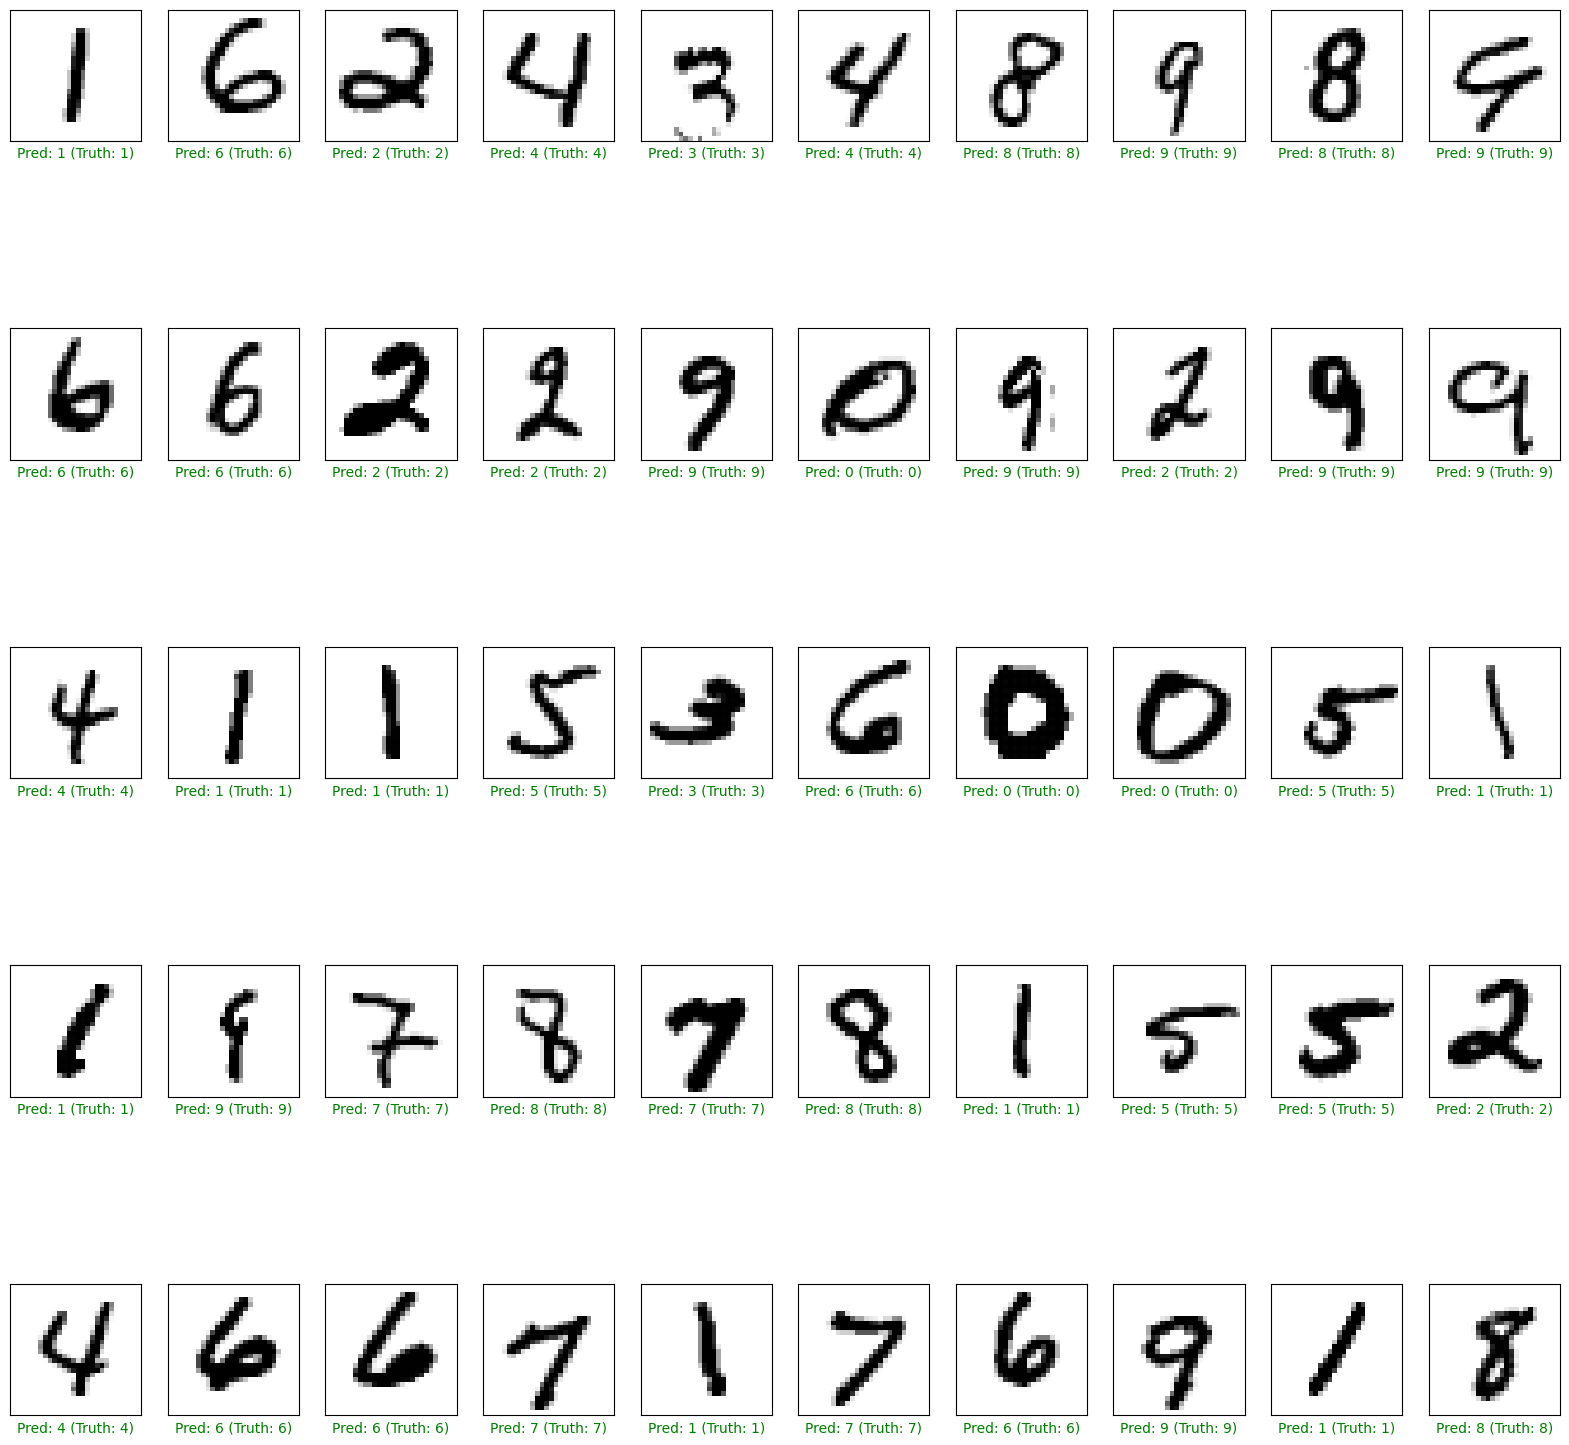

In [3]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np


image_count = 50
test_images = np.array(test_images)
test_labels = np.array(test_labels)
np.random.seed(42)
random_indeces = np.random.choice(test_images.shape[0], image_count)
test_images = test_images[random_indeces]
test_labels = test_labels[random_indeces]


isvc_url = "https://tf-mnist-predictor-workshop.10-101-20-33.sslip.io/v1/models/tf-mnist:predict"

data = json.dumps({"signature_name": "serving_default", "instances": test_images.tolist()})

headers = {"content-type": "application/json"}
json_response = requests.post(isvc_url, data=data, headers=headers, verify=False)

predictions = json.loads(json_response.text)['predictions']

# plot images with prediction in a grid
plt.figure(figsize=(20, 20))
for i in range(image_count):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Pred: {} (Truth: {})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)